### TASK- 02
### STOCK PREDICTION

#### Take stock price of any company you want and predicts its price by using LSTM. Use only Jupyter notebook code


 ##### First, import the necessary libraries for data manipulation, visualization, and model building.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Input

 ##### Load the Meta Stock Price Dataset CSV file into a DataFrame using Pandas and display the first 10 rows of the dataset.

In [2]:
# Load the Dataset
df = pd.read_csv('Meta_Stock_Price_Dataset.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
5,2012-05-25,32.900002,32.950001,31.110001,31.910000,31.910000,37149800
6,2012-05-29,31.480000,31.690001,28.650000,28.840000,28.840000,78063400
7,2012-05-30,28.700001,29.549999,27.860001,28.190001,28.190001,57267900
8,2012-05-31,28.549999,29.670000,26.830000,29.600000,29.600000,111639200
9,2012-06-01,28.889999,29.150000,27.389999,27.719999,27.719999,41855500


 ##### displays a concise summary of the DataFrame, including non-null counts, data types, and memory usage

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2906 non-null   object 
 1   Open       2906 non-null   float64
 2   High       2906 non-null   float64
 3   Low        2906 non-null   float64
 4   Close      2906 non-null   float64
 5   Adj Close  2906 non-null   float64
 6   Volume     2906 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 159.1+ KB


 ##### Extracts the 'Close' column from the DataFrame, reshapes it into a two-dimensional array

In [4]:
# Use the 'Close' column for prediction
data = df['Close'].values
data = data.reshape(-1, 1)

##### Scale the data to a range between 0 and 1 using MinMaxScaler for improved performance during model training.

In [5]:
# Scale the data to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

##### Data is split into a training dataset, which consists comprising of 80% of the total scaled data.

In [6]:
# Create the training dataset
train_data_len = int(np.ceil(len(scaled_data) * 0.8))
train_data = scaled_data[0:train_data_len, :]

##### Prepares the data for LSTM training by creating sequences of 60 time steps as features (x_train) and the subsequent value as the target (y_train). It then converts these lists to NumPy arrays and reshapes x_train to have the required three dimensions for LSTM input.

In [7]:
# Split the data into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

##### Builds an LSTM model with four LSTM layers, each followed by a Dropout layer to prevent overfitting. The final Dense layer outputs the predicted value. The model is compiled with the Adam optimizer and mean squared error loss function. It is then trained on the data with a batch size of 1 and for 1 epoch.

In [8]:
# Build the LSTM model
model = Sequential()

# First LSTM layer with Dropout
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer with Dropout
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Third LSTM layer with Dropout
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Fourth LSTM layer with Dropout
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=20, verbose=2)

E:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
71/71 - 93s - 1s/step - loss: 0.0117
Epoch 2/20
71/71 - 8s - 118ms/step - loss: 0.0024
Epoch 3/20
71/71 - 6s - 79ms/step - loss: 0.0023
Epoch 4/20
71/71 - 5s - 76ms/step - loss: 0.0017
Epoch 5/20
71/71 - 11s - 153ms/step - loss: 0.0021
Epoch 6/20
71/71 - 7s - 94ms/step - loss: 0.0019
Epoch 7/20
71/71 - 6s - 83ms/step - loss: 0.0018
Epoch 8/20
71/71 - 6s - 83ms/step - loss: 0.0015
Epoch 9/20
71/71 - 6s - 82ms/step - loss: 0.0017
Epoch 10/20
71/71 - 5s - 76ms/step - loss: 0.0014
Epoch 11/20
71/71 - 5s - 77ms/step - loss: 0.0017
Epoch 12/20
71/71 - 6s - 84ms/step - loss: 0.0014
Epoch 13/20
71/71 - 6s - 81ms/step - loss: 0.0015
Epoch 14/20
71/71 - 5s - 77ms/step - loss: 0.0013
Epoch 15/20
71/71 - 7s - 105ms/step - loss: 0.0012
Epoch 16/20
71/71 - 7s - 99ms/step - loss: 0.0013
Epoch 17/20
71/71 - 9s - 125ms/step - loss: 0.0017
Epoch 18/20
71/71 - 7s - 104ms/step - loss: 0.0011
Epoch 19/20
71/71 - 8s - 112ms/step - loss: 0.0012
Epoch 20/20
71/71 - 8s - 116ms/step - loss: 0.0012


##### Prepares the test dataset by extracting a portion of scaled data, creates x_test and y_test arrays for evaluation, reshapes x_test for model input, and generates predictions using the trained model. Finally, it transforms the predictions back to the original scale.

In [9]:
# Create the test dataset
test_data = scaled_data[train_data_len - 60:, :]

# Create the x_test and y_test datasets
x_test = []
y_test = data[train_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert x_test to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 337ms/step


##### Plots the training data and the actual vs. predicted stock prices on a graph, showing how the model's predictions compare with actual values.

C:\Users\fathi\AppData\Local\Temp\ipykernel_9844\396880180.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


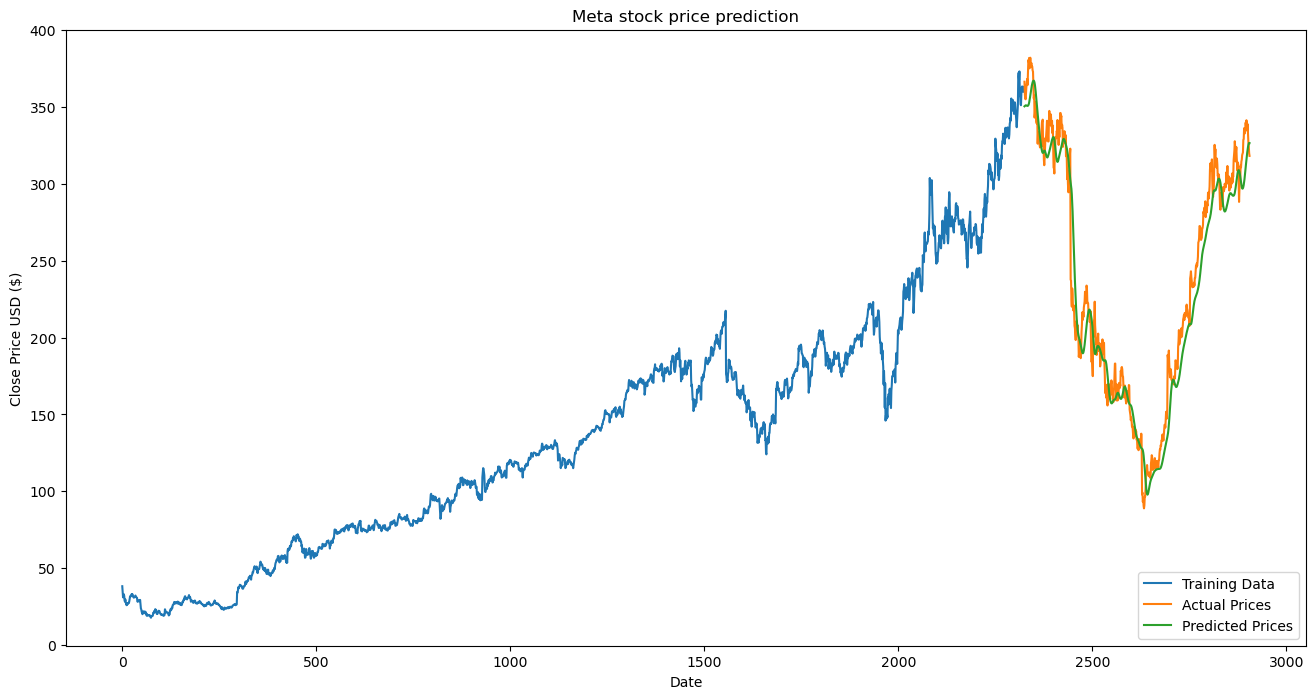

In [11]:
# Plot the data
train = df[:train_data_len]
valid = df[train_data_len:]
valid['Predictions'] = predictions


# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Meta stock price prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Training Data', 'Actual Prices', 'Predicted Prices'], loc='lower right')
plt.show()